# Ultimate Technologies Inc. - Take Home Challenge

## Part 1 - Exploratory Data Analysis

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
# Load data
logins = pd.read_json('logins.json')

In [33]:
# Inspect logins
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [37]:
# Sort values to ensure they are in sequential order
logins.sort_values('login_time', inplace=True)

In [38]:
# Check info for null values and dtype
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 6 to 93140
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


No null values

In [39]:
# Set datetime column to index
logins.set_index('login_time', inplace=True)

In [40]:
# Create column of 1's representing a log-in in at that time
logins['LoginFreq']=1

In [41]:
# Resample 
logins = logins.resample('15min').count()

In [42]:
logins.head()

,LoginFreq
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [43]:
logins.describe()

,LoginFreq
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


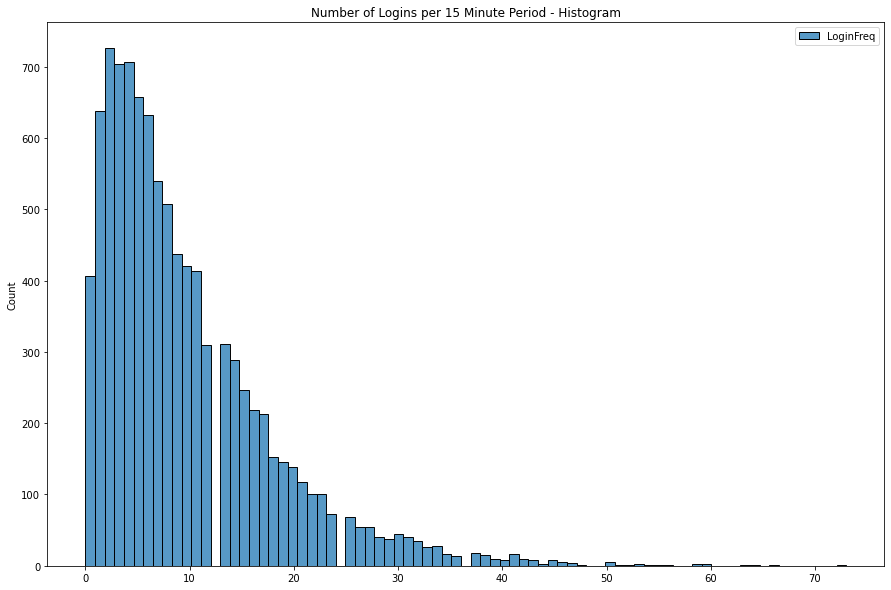

In [59]:
# Plot histogram of logins per 15 minute period
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(logins)
_ = plt.title('Number of Logins per 15 Minute Period - Histogram')

Data are skewed

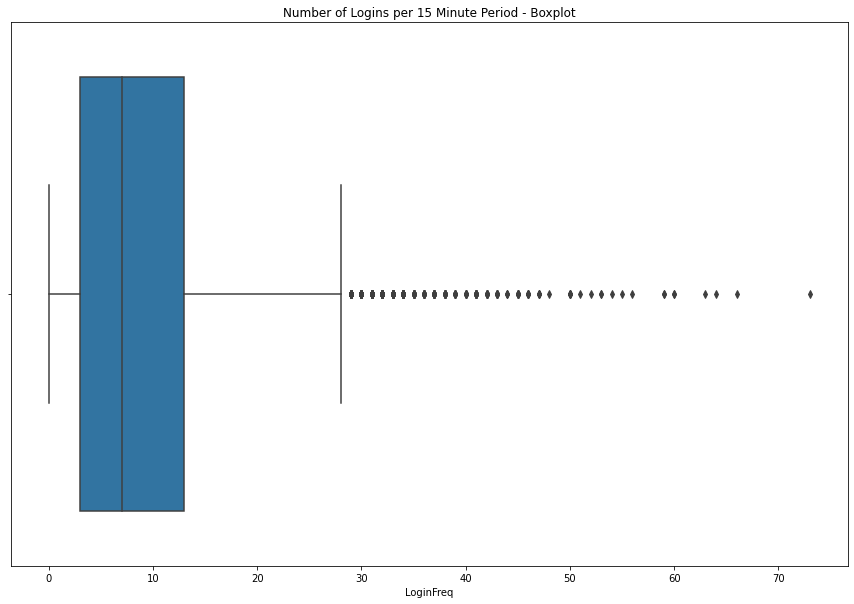

In [61]:
# Plot boxplot of logins per 15 minute period
_ = plt.figure(figsize=(15,10))
_ = sns.boxplot(data=logins, x='LoginFreq')
_ = plt.title('Number of Logins per 15 Minute Period - Boxplot')

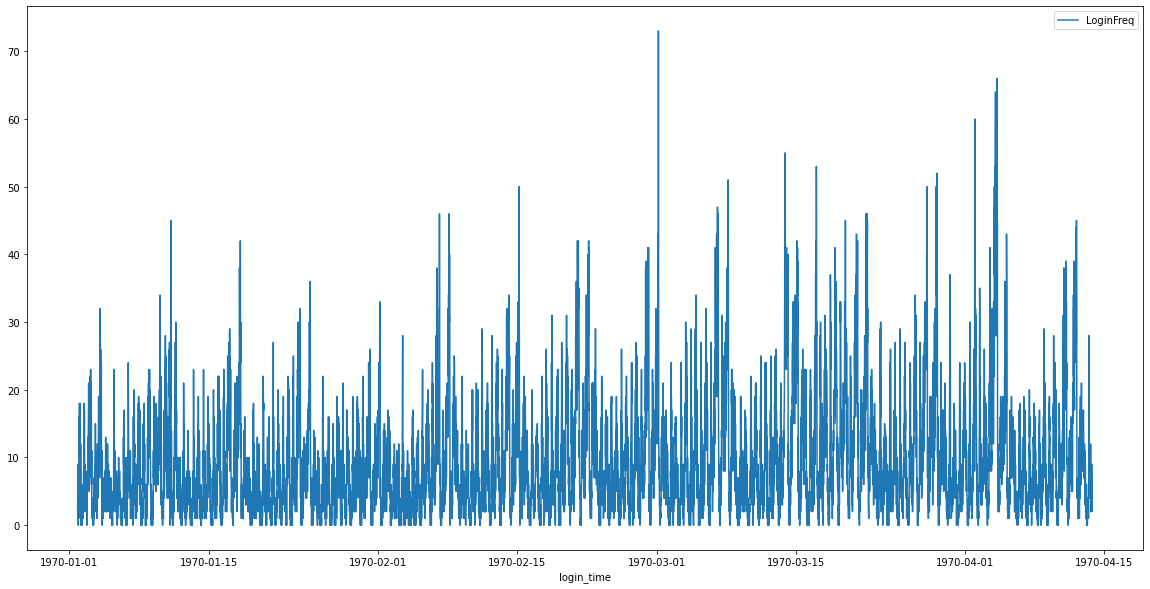

In [44]:
# Plot full data
_ = plt.figure(figsize=(20,10))
_ = sns.lineplot(data=logins)

plt.show()

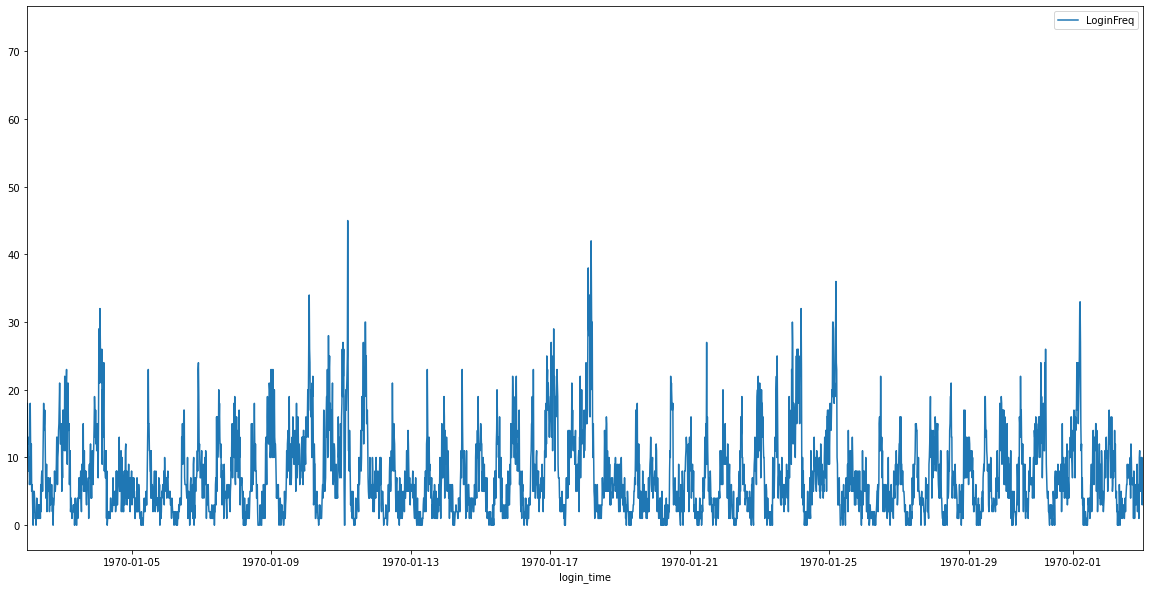

In [45]:
_ = plt.figure(figsize=(20,10))
_ = sns.lineplot(data=logins)
_ = plt.xlim(('1970-01-02', '1970-02-03'))
plt.show()

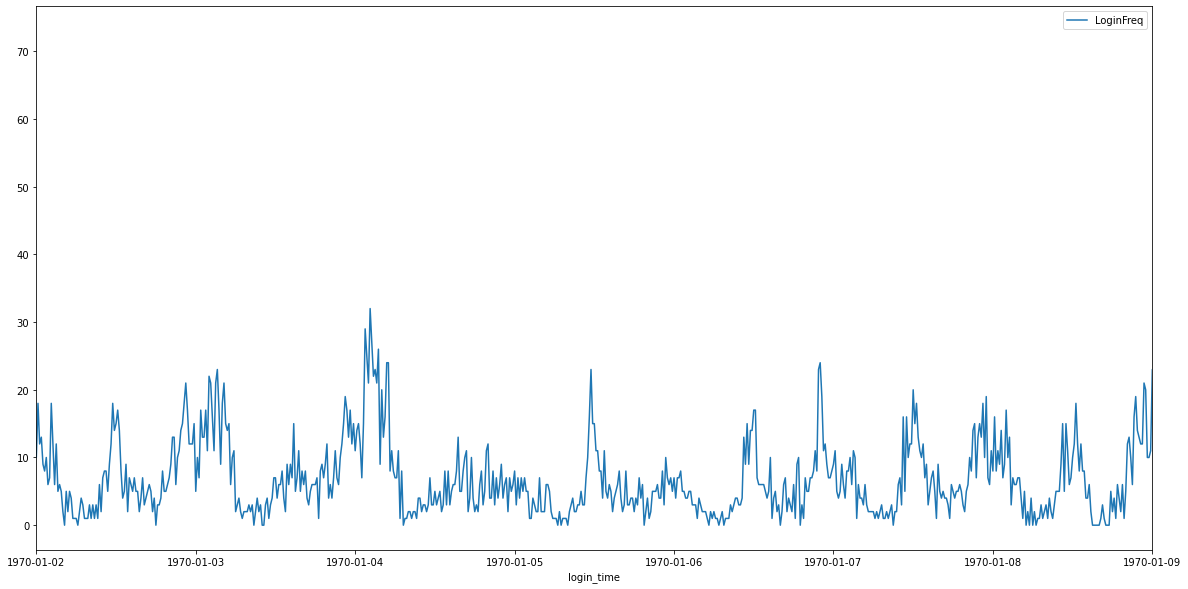

In [46]:
_ = plt.figure(figsize=(20,10))
_ = sns.lineplot(data=logins)
_ = plt.xlim(('1970-01-02', '1970-01-09'))
plt.show()

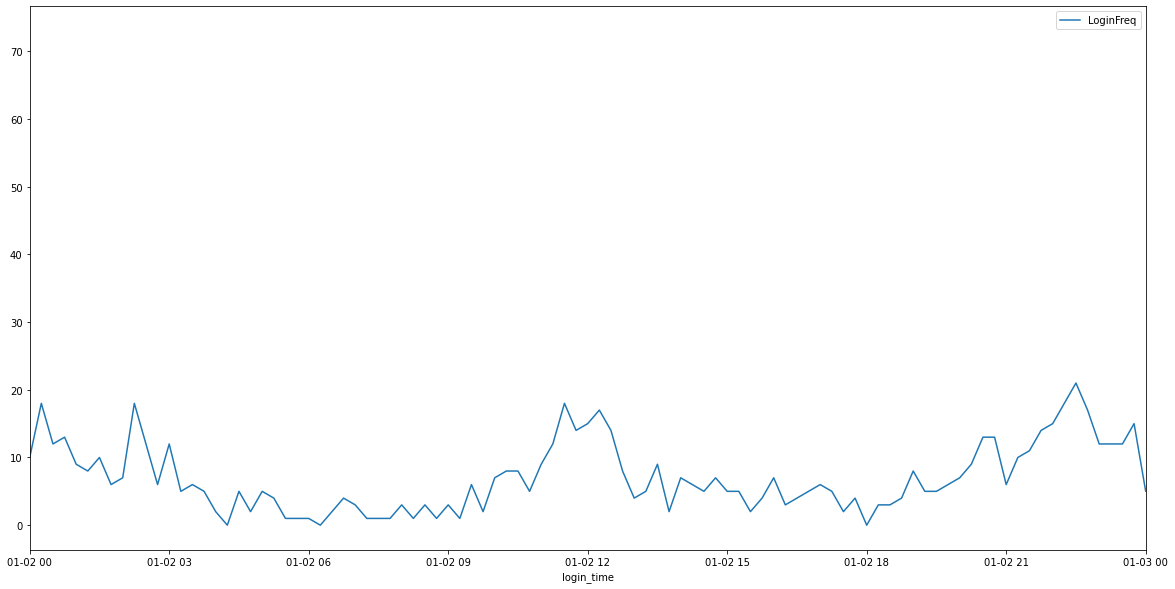

In [47]:
_ = plt.figure(figsize=(20,10))
_ = sns.lineplot(data=logins)
_ = plt.xlim(('1970-01-02', '1970-01-03'))
plt.show()

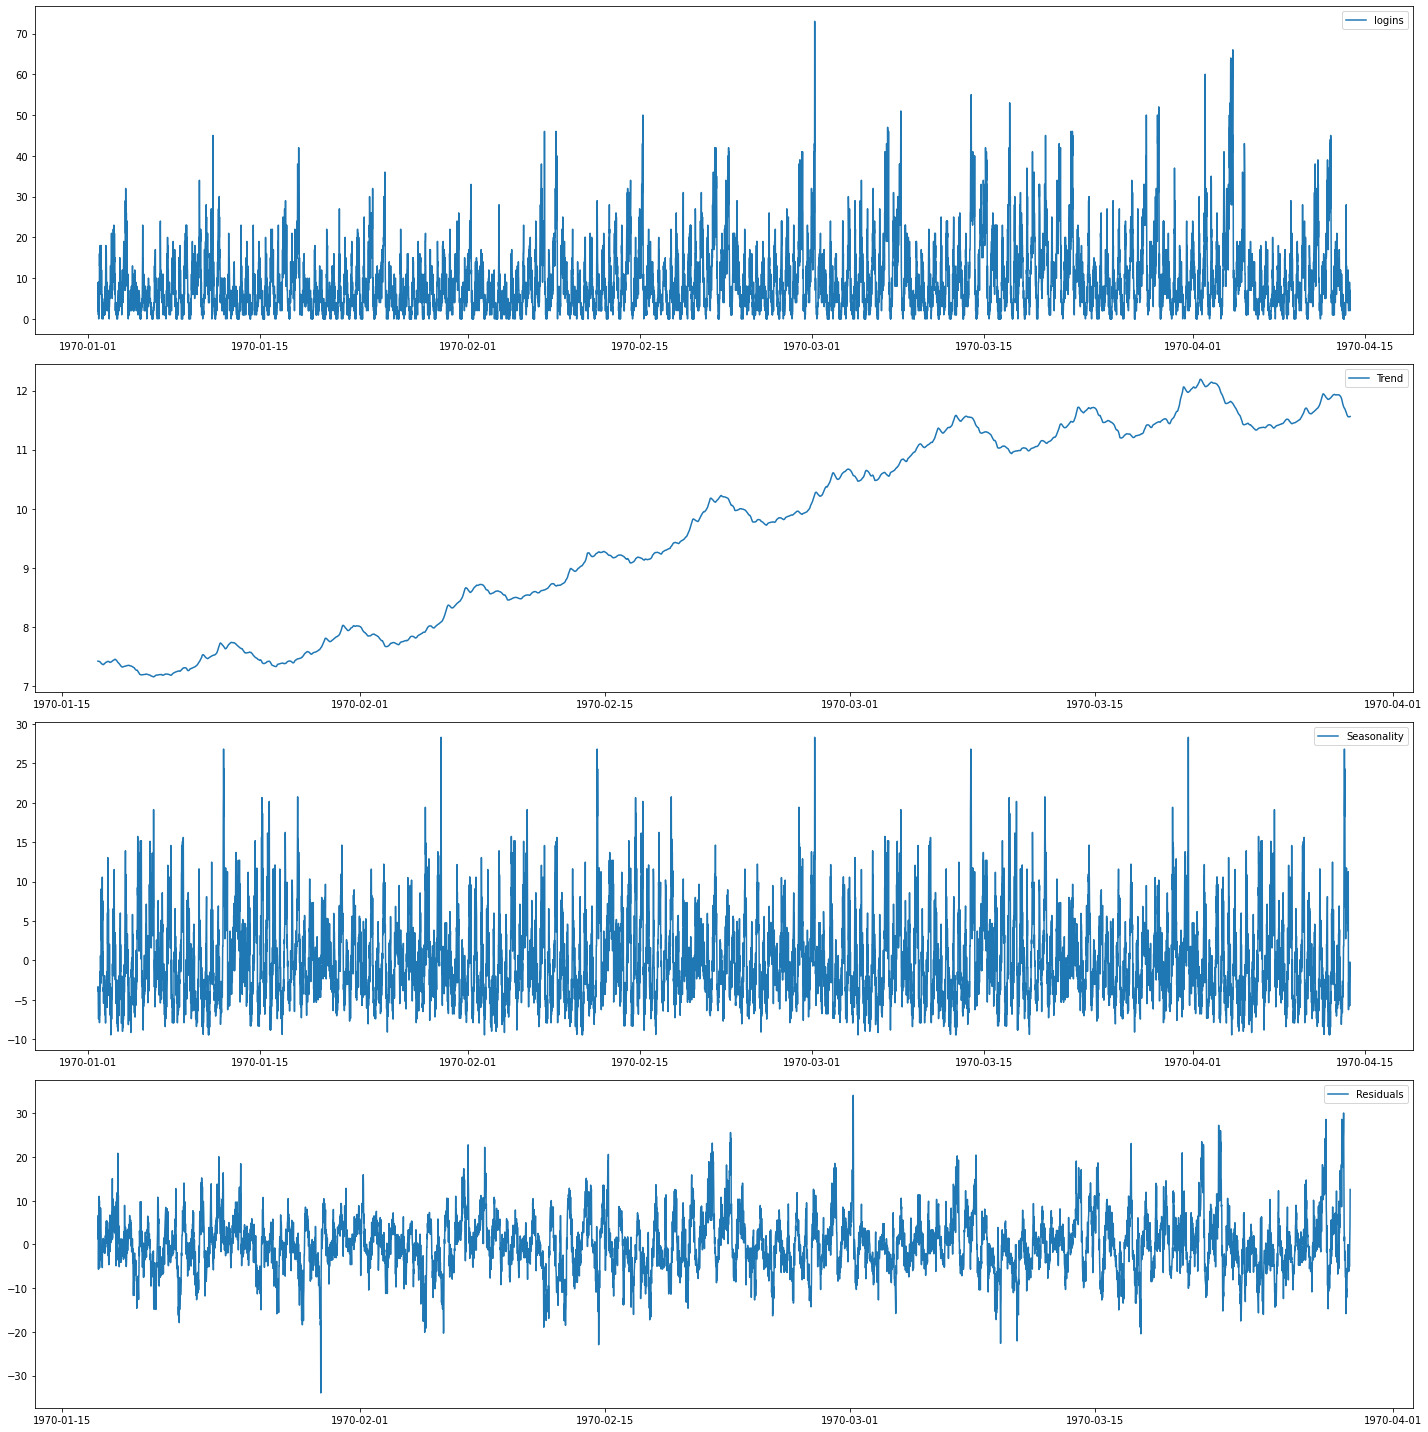

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time-series
decomposition = seasonal_decompose(logins['LoginFreq'], model='additive', period=2920)

# Extract parameters
trend = decomposition.trend
seasonality = decomposition.seasonal
res = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
_ = plt.figure(figsize=(20,20))
_ = plt.subplot(411)
_ = plt.plot(logins['LoginFreq'], label = 'logins')
_ = plt.legend(loc = 'best')
_ = plt.subplot(412)
_ = plt.plot(trend, label = 'Trend')
_ = plt.legend(loc = 'best')
_ = plt.subplot(413)
_ = plt.plot(seasonality, label = 'Seasonality')
_ = plt.legend(loc = 'best')
_ = plt.subplot(414)
_ = plt.plot(res, label = 'Residuals')
_ = plt.legend(loc = 'best')
_ = plt.tight_layout()